In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# CNN Layers

In [7]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  # 7 classes for hand gestures
])

In [8]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Load and preprocess the dataset

In [9]:
# Load and preprocess the dataset
train_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    "D:/Drone/New folder (2)/asl_alphabet_train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 14400 images belonging to 6 classes.


In [10]:
validation_generator = train_datagen.flow_from_directory(
    "D:/Drone/New folder (2)/asl_alphabet_train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 3600 images belonging to 6 classes.


In [11]:
# Train the model
model.fit(train_generator, validation_data=validation_generator, epochs=5)

Epoch 1/5
450/450 [==============================] - 517s 1s/step - loss: 0.4589 - accuracy: 0.8372 - val_loss: 0.5641 - val_accuracy: 0.8342
Epoch 2/5
450/450 [==============================] - 498s 1s/step - loss: 0.0384 - accuracy: 0.9872 - val_loss: 0.8283 - val_accuracy: 0.8253
Epoch 3/5
450/450 [==============================] - 504s 1s/step - loss: 0.0296 - accuracy: 0.9897 - val_loss: 0.4884 - val_accuracy: 0.8775
Epoch 4/5
425/450 [===========================>..] - ETA: 26s - loss: 0.0180 - accuracy: 0.9942

ResourceExhaustedError: Graph execution error:

Detected at node 'Adam/sub_26' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "C:\Users\ADMIN\Conda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\ADMIN\Conda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\Users\ADMIN\Conda3\Lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "C:\Users\ADMIN\Conda3\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\ADMIN\Conda3\Lib\asyncio\base_events.py", line 607, in run_forever
      self._run_once()
    File "C:\Users\ADMIN\Conda3\Lib\asyncio\base_events.py", line 1922, in _run_once
      handle._run()
    File "C:\Users\ADMIN\Conda3\Lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\ADMIN\Conda3\Lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\ADMIN\Conda3\Lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\ADMIN\Conda3\Lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\ADMIN\Conda3\Lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\ADMIN\Conda3\Lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "C:\Users\ADMIN\Conda3\Lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\ADMIN\Conda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "C:\Users\ADMIN\Conda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "C:\Users\ADMIN\Conda3\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\ADMIN\Conda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\ADMIN\Conda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\ADMIN\Conda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3280\12350357.py", line 2, in <module>
      model.fit(train_generator, validation_data=validation_generator, epochs=5)
    File "C:\Users\ADMIN\Conda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ADMIN\Conda3\Lib\site-packages\keras\src\engine\training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\ADMIN\Conda3\Lib\site-packages\keras\src\engine\training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "C:\Users\ADMIN\Conda3\Lib\site-packages\keras\src\engine\training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ADMIN\Conda3\Lib\site-packages\keras\src\engine\training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "C:\Users\ADMIN\Conda3\Lib\site-packages\keras\src\engine\training.py", line 1084, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\Users\ADMIN\Conda3\Lib\site-packages\keras\src\optimizers\optimizer.py", line 544, in minimize
      self.apply_gradients(grads_and_vars)
    File "C:\Users\ADMIN\Conda3\Lib\site-packages\keras\src\optimizers\optimizer.py", line 1230, in apply_gradients
      return super().apply_gradients(grads_and_vars, name=name)
    File "C:\Users\ADMIN\Conda3\Lib\site-packages\keras\src\optimizers\optimizer.py", line 652, in apply_gradients
      iteration = self._internal_apply_gradients(grads_and_vars)
    File "C:\Users\ADMIN\Conda3\Lib\site-packages\keras\src\optimizers\optimizer.py", line 1260, in _internal_apply_gradients
      return tf.__internal__.distribute.interim.maybe_merge_call(
    File "C:\Users\ADMIN\Conda3\Lib\site-packages\keras\src\optimizers\optimizer.py", line 1352, in _distributed_apply_gradients_fn
      distribution.extended.update(
    File "C:\Users\ADMIN\Conda3\Lib\site-packages\keras\src\optimizers\optimizer.py", line 1349, in apply_grad_to_update_var
      return self._update_step(grad, var)
    File "C:\Users\ADMIN\Conda3\Lib\site-packages\keras\src\optimizers\optimizer.py", line 241, in _update_step
      self.update_step(gradient, variable)
    File "C:\Users\ADMIN\Conda3\Lib\site-packages\keras\src\optimizers\adam.py", line 198, in update_step
      m.assign_add((gradient - m) * (1 - self.beta_1))
Node: 'Adam/sub_26'
OOM when allocating tensor with shape[86528,512] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[{{node Adam/sub_26}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_3083]

In [12]:
# Save the trained model
model.save('hand_gesture_model01.h5')

C:\Users\ADMIN\Conda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Model Report

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [24]:
# Generate predictions for the validation dataset
validation_generator.reset()
Y_pred = model.predict(validation_generator, validation_generator.samples // validation_generator.batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

113/113 [==============================] - 16s 138ms/step


In [25]:
y_true = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

In [26]:
confusion_mtx = confusion_matrix(y_true, y_pred)

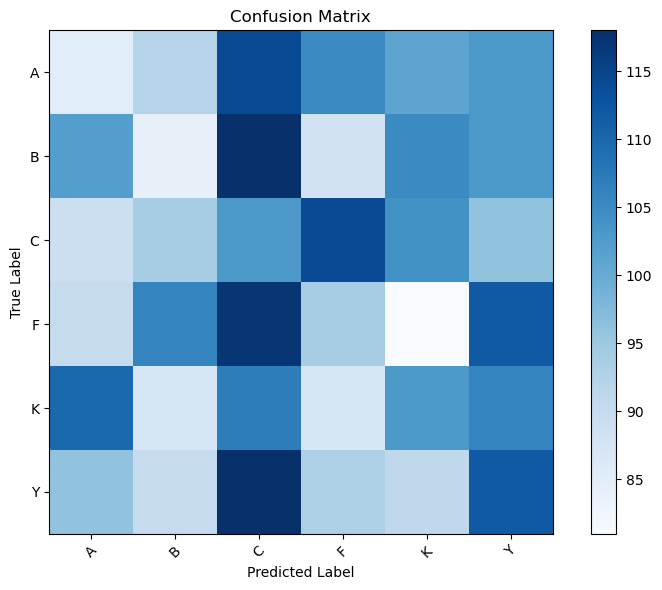

In [27]:
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [28]:
print(classification_report(y_true, y_pred, target_names=class_labels))

              precision    recall  f1-score   support

           A       0.15      0.14      0.15       600
           B       0.15      0.14      0.15       600
           C       0.15      0.17      0.16       600
           F       0.16      0.16      0.16       600
           K       0.18      0.17      0.17       600
           Y       0.18      0.19      0.18       600

    accuracy                           0.16      3600
   macro avg       0.16      0.16      0.16      3600
weighted avg       0.16      0.16      0.16      3600



# Test model

1/1 [==============================] - 0s 110ms/step
Image: B_test.jpg
Class: Down, Probability: 0.0000
Class: Up, Probability: 1.0000
Class: Right, Probability: 0.0000
Class: Back, Probability: 0.0000
Class: Front, Probability: 0.0000
Class: Left, Probability: 0.0000
Predicted Class: Up


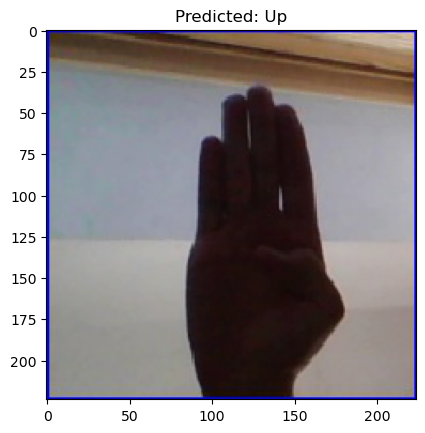

1/1 [==============================] - 0s 36ms/step
Image: C_test.jpg
Class: Down, Probability: 0.0000
Class: Up, Probability: 0.0000
Class: Right, Probability: 1.0000
Class: Back, Probability: 0.0000
Class: Front, Probability: 0.0000
Class: Left, Probability: 0.0000
Predicted Class: Right


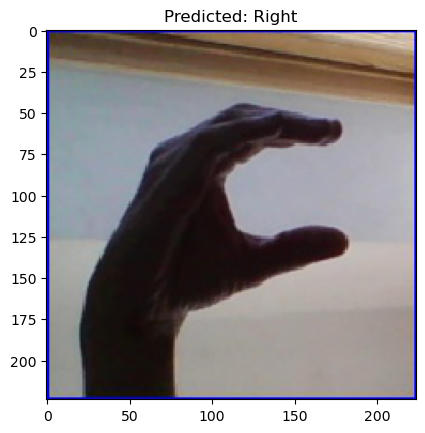

1/1 [==============================] - 0s 38ms/step
Image: F_test.jpg
Class: Down, Probability: 0.0000
Class: Up, Probability: 0.0000
Class: Right, Probability: 0.0000
Class: Back, Probability: 1.0000
Class: Front, Probability: 0.0000
Class: Left, Probability: 0.0000
Predicted Class: Back


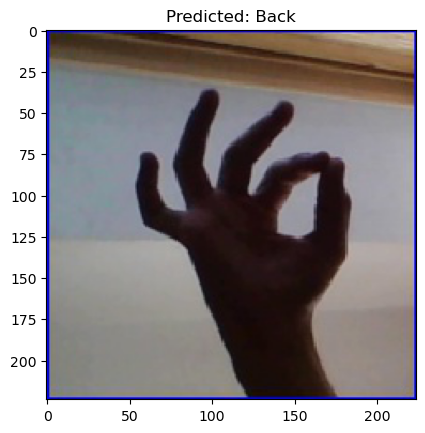

1/1 [==============================] - 0s 38ms/step
Image: A_test.jpg
Class: Down, Probability: 1.0000
Class: Up, Probability: 0.0000
Class: Right, Probability: 0.0000
Class: Back, Probability: 0.0000
Class: Front, Probability: 0.0000
Class: Left, Probability: 0.0000
Predicted Class: Down


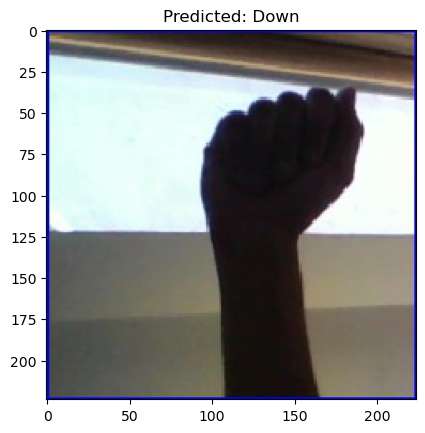

1/1 [==============================] - 0s 45ms/step
Image: Y_test.jpg
Class: Down, Probability: 0.0000
Class: Up, Probability: 0.0000
Class: Right, Probability: 0.0000
Class: Back, Probability: 0.0000
Class: Front, Probability: 0.0000
Class: Left, Probability: 1.0000
Predicted Class: Left


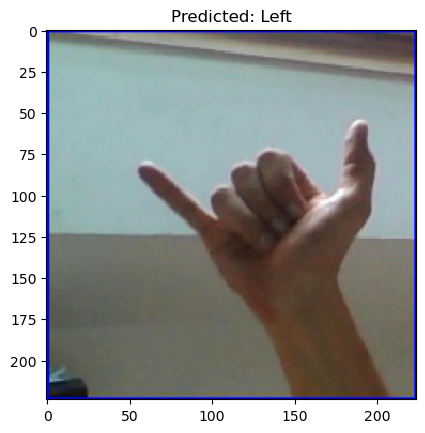

In [34]:
import random
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

model = tf.keras.models.load_model('hand_gesture_model01.h5')
class_names = ["Down", "Up", "Right", "Back", "Front","Left" ,"nothing" ]

# Test on random images
test_dir = "D:/Drone/asl_alphabet_test"
test_images = random.sample(os.listdir(test_dir), 5)  # Choose 5 random images
for image_file in test_images:
    image_path = os.path.join(test_dir, image_file)
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    
    print("Image:", image_file)
    
    for i, class_prob in enumerate(prediction[0]):
        class_name = class_names[i]
        print(f"Class: {class_name}, Probability: {class_prob:.4f}")
    
    print("Predicted Class:", class_names[predicted_class])
    plt.imshow(img)
    plt.title("Predicted: " + class_names[predicted_class])
    plt.show()

# Opencv and mediapipe

In [ ]:
import cv2
import numpy as np
import mediapipe as mp
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('hand_gesture_model01.h5')

# Class names
class_names = ["Down", "Up", "Right", "Back", "Front", "nothing","Left" ]

# Initialize webcam
cap = cv2.VideoCapture(0)

# Initialize Mediapipe hand detection
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(max_num_hands=1)

# Set the dimensions expected by the model
input_height = 224  # Adjusted to match the model's expected height
input_width = 224   # Adjusted to match the model's expected width

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    if not ret:
        break

    # Convert the frame to RGB
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Detect hands using Mediapipe
    results = hands.process(rgb_frame)
    
    if results.multi_hand_landmarks:
        # Get the bounding box of the hand
        for landmarks in results.multi_hand_landmarks:
            x_min, x_max, y_min, y_max = 1000, 0, 1000, 0
            for landmark in landmarks.landmark:
                x, y = int(landmark.x * frame.shape[1]), int(landmark.y * frame.shape[0])
                if x < x_min:
                    x_min = x
                if x > x_max:
                    x_max = x
                if y < y_min:
                    y_min = y
                if y > y_max:
                    y_max = y

            # Extract hand region
            hand_frame = frame[y_min:y_max, x_min:x_max]
            
            if hand_frame.shape[0] > 0 and hand_frame.shape[1] > 0:
                # Preprocess the hand frame
                resized_hand_frame = cv2.resize(hand_frame, (input_width, input_height))
                normalized_hand_frame = resized_hand_frame / 255.0
                input_frame = np.expand_dims(normalized_hand_frame, axis=0)/7
                
                # Get model prediction
                prediction = model.predict(input_frame)
                predicted_class = np.argmax(prediction)
                class_name = class_names[predicted_class]
                print(prediction)
                print(predicted_class)
                # Display the predicted class on the hand frame
                cv2.putText(hand_frame, class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

                # Display both frames in separate windows
                cv2.imshow('Original Frame', frame)
                cv2.imshow('Hand Frame', hand_frame)

    # Exit when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close all windows
cap.release()
cv2.destroyAllWindows()


# Opencv and cvzone

In [3]:
import cv2
from cvzone.HandTrackingModule import HandDetector
from cvzone.ClassificationModule import Classifier
import numpy as np
import math


cap = cv2.VideoCapture(0)
detector = HandDetector(maxHands=1)
classifier = Classifier('hand_gesture_model01.h5', "Labels.txt")

offset = 20
imgSize = 300

counter = 0

labels =  ["Down", "Up", "Right", "Back", "Front","Left" ]

while True:
    success, img = cap.read()
    imgOutput = img.copy()
    hands, img = detector.findHands(img)
    if hands:
        hand = hands[0]
        x, y, w, h = hand['bbox']

        imgWhite = np.ones((imgSize, imgSize, 3), np.uint8) * 255
        imgCrop = img[y - offset:y + h + offset, x - offset:x + w + offset]

        imgCropShape = imgCrop.shape

        aspectRatio = h / w

        if aspectRatio > 1:
            k = imgSize / h
            wCal = math.ceil(k * w)
            imgResize = cv2.resize(imgCrop, (wCal, imgSize))
            imgResizeShape = imgResize.shape
            wGap = math.ceil((imgSize - wCal) / 2)
            imgWhite[:, wGap:wCal + wGap] = imgResize
            prediction, index = classifier.getPrediction(imgWhite, draw=False)
            print(prediction, index)

        else:
            k = imgSize / w
            hCal = math.ceil(k * h)
            imgResize = cv2.resize(imgCrop, (imgSize, hCal))
            imgResizeShape = imgResize.shape
            hGap = math.ceil((imgSize - hCal) / 2)
            imgWhite[hGap:hCal + hGap, :] = imgResize
            prediction, index = classifier.getPrediction(imgWhite, draw=False)

        cv2.rectangle(imgOutput, (x - offset, y - offset-50),
                      (x - offset+90, y - offset-50+50), (255, 0, 255), cv2.FILLED)
        cv2.putText(imgOutput, labels[index], (x, y -26), cv2.FONT_HERSHEY_COMPLEX, 1.7, (255, 255, 255), 2)
        cv2.rectangle(imgOutput, (x-offset, y-offset),
                      (x + w+offset, y + h+offset), (255, 0, 255), 4)


        cv2.imshow("ImageCrop", imgCrop)
        cv2.imshow("ImageWhite", imgWhite)

    cv2.imshow("Image", imgOutput)
    cv2.waitKey(1)
     # Exit when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
# Release the webcam and close all windows
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 84ms/step
[8.2619446e-21, 4.766979e-31, 9.854943e-25, 0.5971564, 4.468018e-05, 0.4027989] 3
1/1 [==============================] - 0s 37ms/step
[8.616354e-30, 2.5204628e-34, 4.840497e-37, 2.4416107e-05, 6.32977e-13, 0.99997556] 5
1/1 [==============================] - 0s 38ms/step
[4.043162e-22, 1.4408014e-25, 2.3316784e-31, 0.70488596, 4.6539124e-09, 0.29511407] 3
1/1 [==============================] - 0s 38ms/step
[6.957359e-20, 2.6367397e-20, 5.5652292e-33, 0.9998306, 2.3753557e-07, 0.00016915843] 3
1/1 [==============================] - 0s 38ms/step
[4.5320388e-29, 1.3286797e-37, 2.3019966e-37, 0.9772134, 2.711907e-15, 0.022786574] 3
1/1 [==============================] - 0s 36ms/step
[6.646107e-38, 0.0, 0.0, 1.0, 4.373104e-27, 2.418923e-10] 3
1/1 [==============================] - 0s 37ms/step
[3.910322e-30, 0.0, 9.770806e-37, 0.18688561, 4.374131e-28, 0.81311435] 5
1/1 [==============================] - 0s 37ms/step
[1.4955195e-37, 0.0, 1

1/1 [==============================] - 0s 33ms/step
[3.5746576e-26, 6.7041856e-29, 1.8880166e-16, 0.00021789466, 0.99969745, 8.467669e-05] 4
1/1 [==============================] - 0s 33ms/step
[1.8455832e-26, 4.2063055e-30, 4.8987587e-15, 0.032114133, 0.9643138, 0.0035720672] 4
1/1 [==============================] - 0s 34ms/step
[4.690676e-25, 7.4772062e-31, 1.83399e-13, 0.0013144481, 0.9480241, 0.05066146] 4
1/1 [==============================] - 0s 33ms/step
[2.4784286e-24, 3.267381e-30, 4.2053336e-12, 0.044908334, 0.8120197, 0.14307189] 4
1/1 [==============================] - 0s 34ms/step
[1.847166e-23, 2.3274943e-31, 3.3959917e-13, 9.934596e-05, 0.05489365, 0.945007] 5
1/1 [==============================] - 0s 35ms/step
[1.016947e-24, 7.13405e-32, 1.0155828e-12, 2.5660422e-06, 0.044021748, 0.95597565] 5
1/1 [==============================] - 0s 34ms/step
[1.0166888e-24, 1.7254266e-31, 7.8453287e-13, 1.5846144e-06, 0.038308, 0.9616904] 5
1/1 [==============================] - 0s 34

1/1 [==============================] - 0s 34ms/step
[3.0336755e-25, 1.2971371e-29, 2.1722255e-14, 0.94761264, 0.04800534, 0.0043821028] 3
1/1 [==============================] - 0s 34ms/step
[3.0763568e-24, 1.828009e-30, 1.259915e-12, 0.9858737, 0.0068856124, 0.0072406973] 3
1/1 [==============================] - 0s 35ms/step
[1.4291279e-23, 2.4022198e-31, 1.41463005e-11, 0.17881498, 0.000349088, 0.8208359] 5
1/1 [==============================] - 0s 33ms/step
[9.7865763e-26, 1.0897756e-30, 4.5447373e-14, 0.99981314, 0.000119763106, 6.7160254e-05] 3
1/1 [==============================] - 0s 33ms/step
[1.6169042e-26, 6.005545e-30, 1.038259e-14, 0.9984035, 0.0015942828, 2.2121435e-06] 3
1/1 [==============================] - 0s 35ms/step
[5.1238365e-26, 1.6649164e-30, 1.4867485e-14, 0.9962399, 0.0037571979, 2.938089e-06] 3
1/1 [==============================] - 0s 34ms/step
[3.8873183e-26, 2.9773905e-30, 4.5906238e-14, 0.9192405, 0.080654554, 0.00010495512] 3
1/1 [========================

1/1 [==============================] - 0s 34ms/step
[1.5269598e-21, 3.938794e-24, 7.8634304e-14, 9.131111e-07, 0.86893356, 0.13106555] 4
1/1 [==============================] - 0s 33ms/step
[2.15565e-21, 1.4319668e-23, 1.4732567e-13, 7.777625e-07, 0.7993848, 0.20061441] 4
1/1 [==============================] - 0s 34ms/step
[6.4999424e-21, 1.4355457e-25, 1.6852521e-13, 4.2542577e-08, 0.0012001294, 0.9987998] 5
1/1 [==============================] - 0s 35ms/step
[4.2379625e-21, 2.2869812e-25, 4.902656e-14, 1.1780063e-08, 0.00458839, 0.9954116] 5
1/1 [==============================] - 0s 34ms/step
[2.1023095e-22, 1.7965967e-29, 1.2103486e-15, 4.193198e-12, 1.923677e-06, 0.9999981] 5
1/1 [==============================] - 0s 34ms/step
[1.61106e-20, 8.5133553e-23, 1.6289336e-14, 1.2234231e-08, 0.8123405, 0.18765958] 4
1/1 [==============================] - 0s 33ms/step
[4.90991e-19, 4.334011e-24, 2.0024356e-13, 2.6624086e-08, 0.0071548987, 0.9928451] 5
1/1 [==============================] - 

1/1 [==============================] - 0s 34ms/step
[2.5954863e-12, 1.7736601e-06, 1.00805935e-22, 1.9562943e-07, 0.99987483, 0.00012309488] 4
1/1 [==============================] - 0s 34ms/step
[1.7216632e-10, 0.0007620454, 8.160052e-21, 4.842959e-06, 0.6548554, 0.3443777] 4
1/1 [==============================] - 0s 34ms/step
[1.9346772e-12, 6.2622047e-07, 1.0585283e-22, 1.4895879e-06, 0.9998877, 0.000110142675] 4
1/1 [==============================] - 0s 35ms/step
[3.2946326e-12, 4.2684476e-07, 1.7640158e-22, 2.2578001e-06, 0.9996948, 0.00030242887] 4
1/1 [==============================] - 0s 33ms/step
[1.4537601e-11, 5.9771096e-06, 1.7784898e-21, 5.5222084e-05, 0.99960726, 0.00033152723] 4
1/1 [==============================] - 0s 33ms/step
[8.346121e-11, 1.0517612e-05, 3.163334e-21, 3.3716464e-05, 0.99690646, 0.0030492898] 4
1/1 [==============================] - 0s 34ms/step
[2.8338481e-11, 7.367347e-06, 1.270554e-21, 7.758987e-06, 0.99971384, 0.00027104636] 4
1/1 [===============

1/1 [==============================] - 0s 37ms/step
[4.7978487e-32, 0.0, 4.1982977e-26, 1.950538e-13, 1.4225703e-10, 1.0] 5
1/1 [==============================] - 0s 35ms/step
[5.2677575e-32, 0.0, 2.3579006e-25, 3.8659015e-13, 7.6262324e-10, 1.0] 5
1/1 [==============================] - 0s 34ms/step
[1.5391526e-31, 0.0, 9.0189124e-26, 4.4098344e-15, 1.2900466e-12, 1.0] 5
1/1 [==============================] - 0s 36ms/step
[1.7335756e-30, 0.0, 3.305721e-25, 4.5526757e-14, 7.772969e-10, 1.0] 5
1/1 [==============================] - 0s 36ms/step
[1.2520915e-30, 0.0, 6.0315817e-21, 1.8475522e-14, 6.865799e-10, 1.0] 5
1/1 [==============================] - 0s 35ms/step
[8.03406e-31, 0.0, 4.655608e-26, 3.670516e-20, 7.684411e-08, 0.9999999] 5
1/1 [==============================] - 0s 36ms/step
[1.3237245e-28, 4.093314e-37, 2.697458e-21, 1.2303229e-19, 0.00014543495, 0.99985456] 5
1/1 [==============================] - 0s 36ms/step
[1.1388445e-25, 1.7688838e-32, 6.2922307e-24, 8.750983e-14, 9

1/1 [==============================] - 0s 37ms/step
[1.4190193e-18, 1.6694798e-22, 9.447186e-07, 0.00052506826, 0.99727964, 0.0021942055] 4
1/1 [==============================] - 0s 39ms/step
[7.762838e-19, 8.2135434e-23, 5.9753745e-07, 5.9213503e-06, 0.999984, 9.448512e-06] 4
1/1 [==============================] - 0s 38ms/step
[3.3745951e-16, 1.5612631e-19, 1.6342029e-06, 0.09049158, 0.9042468, 0.005259953] 4
1/1 [==============================] - 0s 38ms/step
[1.9433751e-16, 4.49257e-21, 3.2286853e-06, 0.006772813, 0.007842751, 0.9853812] 5
1/1 [==============================] - 0s 36ms/step
[3.685168e-17, 3.149863e-20, 1.6631276e-06, 0.7832159, 0.20995463, 0.0068277935] 3
1/1 [==============================] - 0s 40ms/step
[4.649406e-17, 5.354325e-20, 5.102294e-06, 0.6601012, 0.33562928, 0.004264442] 3
1/1 [==============================] - 0s 39ms/step
[2.2983974e-18, 4.5041952e-20, 2.6441174e-05, 0.10220079, 0.89444655, 0.0033262444] 4
1/1 [==============================] - 0s 40m

1/1 [==============================] - 0s 39ms/step
[2.4417117e-14, 0.00027355246, 4.576889e-30, 3.1036056e-05, 0.9996954, 6.913623e-10] 4
1/1 [==============================] - 0s 38ms/step
[2.0092518e-14, 3.123213e-05, 1.9191001e-29, 2.722345e-06, 0.999966, 4.1151754e-10] 4
1/1 [==============================] - 0s 38ms/step
[2.9918268e-16, 5.5031755e-06, 1.087967e-30, 1.8891144e-05, 0.99997556, 5.221819e-11] 4
1/1 [==============================] - 0s 39ms/step
[1.325145e-13, 4.2360767e-08, 1.5777591e-29, 1.684284e-09, 1.0, 2.8185758e-08] 4
1/1 [==============================] - 0s 39ms/step
[1.0311207e-13, 1.01084645e-07, 4.7211476e-29, 1.562971e-11, 0.9999999, 8.38622e-09] 4
1/1 [==============================] - 0s 38ms/step
[3.835898e-12, 2.6481362e-07, 4.6850345e-28, 6.263717e-11, 0.99999976, 5.843204e-08] 4
1/1 [==============================] - 0s 38ms/step
[1.267167e-12, 1.6206067e-06, 7.84971e-30, 4.4800708e-13, 0.99999833, 4.2010686e-08] 4
1/1 [============================

1/1 [==============================] - 0s 39ms/step
[6.8513965e-16, 3.4452735e-10, 2.2874967e-20, 2.5030302e-05, 0.014397037, 0.985578] 5
1/1 [==============================] - 0s 40ms/step
[4.926849e-16, 1.7692103e-09, 1.2271641e-20, 1.1587529e-05, 0.035067428, 0.964921] 5
1/1 [==============================] - 0s 40ms/step
[1.7178769e-15, 9.8017506e-12, 3.4535582e-20, 0.00054220424, 0.1741039, 0.82535386] 5
1/1 [==============================] - 0s 40ms/step
[4.6917102e-17, 1.1985776e-16, 2.7058152e-13, 7.474917e-05, 2.6329126e-06, 0.99992263] 5
1/1 [==============================] - 0s 39ms/step
[2.0736806e-21, 1.0864992e-25, 8.4727213e-16, 1.5454525e-10, 1.8255735e-08, 1.0] 5
1/1 [==============================] - 0s 41ms/step
[5.973291e-14, 2.3071992e-11, 1.6086942e-12, 0.028652716, 0.84451914, 0.12682818] 4
1/1 [==============================] - 0s 39ms/step
[9.698661e-18, 3.363686e-22, 4.6573813e-12, 3.2857834e-08, 2.28595e-06, 0.99999774] 5
1/1 [==============================] 

1/1 [==============================] - 0s 39ms/step
[3.4807173e-37, 0.0, 1.0336985e-28, 2.929611e-14, 1.5542625e-09, 1.0] 5
1/1 [==============================] - 0s 40ms/step
[2.1718478e-36, 0.0, 1.1023025e-29, 1.5771604e-14, 3.8837258e-10, 1.0] 5
1/1 [==============================] - 0s 39ms/step
[2.2022534e-32, 8.1587756e-38, 1.2213525e-30, 7.3364825e-10, 3.219352e-11, 1.0] 5
1/1 [==============================] - 0s 40ms/step
[1.0398622e-23, 1.3995911e-24, 2.4125125e-28, 0.026465002, 3.176531e-07, 0.9735346] 5
1/1 [==============================] - 0s 42ms/step
[1.09871655e-23, 2.3844647e-19, 1.677264e-27, 0.9911588, 1.6382864e-07, 0.008841] 3
1/1 [==============================] - 0s 43ms/step
[4.8679513e-27, 1.4175548e-23, 1.5268718e-30, 0.9999957, 3.6251193e-11, 4.2977513e-06] 3
1/1 [==============================] - 0s 41ms/step
[6.230766e-28, 6.6057145e-31, 5.8024113e-31, 1.0, 2.7149346e-15, 4.2143136e-10] 3
1/1 [==============================] - 0s 40ms/step
[1.6458897e-27, 

1/1 [==============================] - 0s 39ms/step
[0.0, 0.0, 0.0, 1.0, 2.1486062e-24, 7.2966535e-14] 3
1/1 [==============================] - 0s 39ms/step
[0.0, 0.0, 0.0, 1.0, 9.003414e-25, 3.332246e-17] 3
1/1 [==============================] - 0s 40ms/step
[0.0, 0.0, 0.0, 1.0, 5.865588e-25, 2.3965954e-17] 3
1/1 [==============================] - 0s 40ms/step
[0.0, 0.0, 0.0, 1.0, 1.3559187e-27, 8.802635e-18] 3
1/1 [==============================] - 0s 40ms/step
[0.0, 0.0, 0.0, 1.0, 3.9726574e-25, 2.2414804e-15] 3
1/1 [==============================] - 0s 40ms/step
[0.0, 0.0, 0.0, 1.0, 1.4630096e-25, 4.1428752e-16] 3
1/1 [==============================] - 0s 41ms/step
[0.0, 0.0, 0.0, 1.0, 1.7062999e-25, 2.5661376e-15] 3
1/1 [==============================] - 0s 40ms/step
[0.0, 0.0, 0.0, 1.0, 2.7502785e-25, 1.7842167e-15] 3
1/1 [==============================] - 0s 43ms/step
[0.0, 0.0, 0.0, 1.0, 1.3578514e-24, 1.73166e-14] 3
1/1 [==============================] - 0s 42ms/step
[0.0, 0.0

1/1 [==============================] - 0s 40ms/step
[4.8781703e-30, 2.2905554e-34, 0.0, 1.0, 5.539115e-21, 1.1465173e-10] 3
1/1 [==============================] - 0s 41ms/step
[6.5151e-30, 2.5233168e-32, 0.0, 1.0, 4.696937e-20, 1.5411121e-12] 3
1/1 [==============================] - 0s 41ms/step
[1.5476979e-28, 1.21536506e-32, 0.0, 1.0, 1.2410947e-19, 2.6393119e-11] 3
1/1 [==============================] - 0s 43ms/step
[8.618547e-28, 1.5868546e-30, 0.0, 1.0, 1.6557969e-18, 2.1730533e-10] 3
1/1 [==============================] - 0s 42ms/step
[1.679094e-28, 2.041147e-31, 0.0, 1.0, 3.2854027e-19, 1.3457961e-11] 3
1/1 [==============================] - 0s 42ms/step
[4.4607147e-28, 2.366327e-31, 0.0, 1.0, 2.1193401e-18, 1.3264873e-10] 3
1/1 [==============================] - 0s 40ms/step
[2.8224556e-26, 5.203291e-31, 1.803521e-37, 0.99999607, 1.8367713e-15, 3.945375e-06] 3
1/1 [==============================] - 0s 39ms/step
[4.496367e-29, 4.9750236e-32, 3.4737783e-38, 1.0, 2.8027056e-17, 2.

1/1 [==============================] - 0s 41ms/step
[0.0, 0.0, 2.8005958e-35, 1.0, 1.8275796e-31, 3.5011666e-10] 3
1/1 [==============================] - 0s 40ms/step
[0.0, 0.0, 2.1135813e-35, 1.0, 3.4429296e-33, 1.4679746e-09] 3
1/1 [==============================] - 0s 41ms/step
[0.0, 0.0, 2.0009154e-35, 1.0, 5.369934e-32, 4.1639645e-08] 3
1/1 [==============================] - 0s 41ms/step
[3.993244e-30, 0.0, 9.6445315e-36, 0.99968576, 3.653682e-25, 0.00031424916] 3
1/1 [==============================] - 0s 42ms/step
[4.1758045e-31, 6.077059e-38, 3.580951e-38, 0.99999774, 2.3978904e-23, 2.3000744e-06] 3
1/1 [==============================] - 0s 41ms/step
[1.12956265e-29, 4.6975486e-34, 2.3321945e-37, 1.0, 4.980648e-23, 4.6526864e-08] 3
1/1 [==============================] - 0s 44ms/step
[5.804675e-29, 9.81133e-32, 3.977969e-38, 1.0, 2.4981513e-21, 2.7749202e-08] 3
1/1 [==============================] - 0s 43ms/step
[2.6796318e-23, 3.780935e-30, 4.290581e-35, 1.0, 7.3649804e-19, 2.19

[1.8543394e-21, 4.840321e-23, 1.2594363e-37, 0.9999969, 1.7561579e-11, 3.057971e-06] 3
1/1 [==============================] - 0s 43ms/step
[1.7323783e-22, 2.4820653e-23, 2.0993159e-36, 0.9999993, 1.9356168e-12, 7.2697384e-07] 3
1/1 [==============================] - 0s 42ms/step
[2.955451e-25, 4.0242553e-26, 2.0174685e-37, 1.0, 1.0552198e-15, 1.4122861e-10] 3
1/1 [==============================] - 0s 42ms/step
[6.6674595e-24, 4.842487e-27, 1.0734178e-35, 1.0, 8.015113e-16, 6.433076e-10] 3
1/1 [==============================] - 0s 41ms/step
[5.5456127e-26, 2.8921893e-26, 1.4183189e-37, 1.0, 1.5632244e-15, 2.8357395e-12] 3
1/1 [==============================] - 0s 41ms/step
[1.942868e-23, 2.5910205e-25, 1.4903322e-36, 1.0, 7.720592e-13, 8.846842e-09] 3
1/1 [==============================] - 0s 42ms/step
[3.796206e-25, 1.7776042e-25, 1.7274237e-37, 1.0, 9.675708e-16, 2.192343e-12] 3
1/1 [==============================] - 0s 41ms/step
[1.2897183e-25, 1.6534421e-26, 0.0, 1.0, 4.6063083e-13,

1/1 [==============================] - 0s 44ms/step
[2.8351892e-26, 3.8994708e-28, 9.7171035e-15, 1.0, 7.351746e-15, 5.259449e-08] 3
1/1 [==============================] - 0s 43ms/step
[3.973302e-20, 9.796801e-27, 1.991313e-12, 0.04855615, 7.0155784e-11, 0.9514438] 5
1/1 [==============================] - 0s 42ms/step
[4.027398e-20, 2.0931755e-28, 8.729129e-11, 0.0013767015, 2.9985114e-10, 0.99862325] 5
1/1 [==============================] - 0s 42ms/step
[1.5799881e-21, 7.1414307e-35, 1.9441301e-10, 2.222777e-08, 1.7963749e-13, 1.0] 5
1/1 [==============================] - 0s 42ms/step
[4.744437e-22, 1.233911e-32, 2.9722434e-08, 3.7115647e-10, 1.1586567e-10, 1.0] 5
1/1 [==============================] - 0s 42ms/step
[1.3071958e-20, 8.219652e-32, 6.3679257e-12, 8.03154e-06, 1.1945789e-10, 0.999992] 5
1/1 [==============================] - 0s 42ms/step
[6.7423867e-20, 1.35031e-31, 1.1793389e-13, 7.883697e-06, 4.9443876e-11, 0.99999213] 5
1/1 [==============================] - 0s 41ms/ste

1/1 [==============================] - 0s 45ms/step
[2.386293e-11, 9.782007e-17, 2.6641602e-18, 0.041180078, 0.017899167, 0.94092077] 5
1/1 [==============================] - 0s 43ms/step
[2.3075404e-12, 6.888843e-24, 2.4041394e-12, 0.08975784, 2.2206105e-07, 0.91024196] 5
1/1 [==============================] - 0s 42ms/step
[7.399661e-14, 4.1696535e-15, 1.179477e-18, 0.99964845, 0.00014267176, 0.00020884232] 3
1/1 [==============================] - 0s 43ms/step
[6.0817386e-14, 5.3298523e-17, 8.4371734e-17, 0.988772, 0.0107113505, 0.00051663874] 3
1/1 [==============================] - 0s 43ms/step
[9.212199e-18, 7.954324e-19, 2.6517766e-15, 0.0025954135, 0.99636227, 0.0010423743] 4
1/1 [==============================] - 0s 42ms/step
[6.5654615e-14, 3.666306e-15, 1.0231694e-15, 0.3398281, 0.6601443, 2.7522818e-05] 4
1/1 [==============================] - 0s 44ms/step
[7.006455e-18, 5.212086e-16, 3.999994e-10, 0.009718644, 0.9889557, 0.0013256507] 4
1/1 [==============================] -

1/1 [==============================] - 0s 42ms/step
[5.3875775e-12, 1.2756765e-17, 2.0564766e-22, 0.01287434, 9.76723e-05, 0.987028] 5
1/1 [==============================] - 0s 42ms/step
[5.6241043e-07, 4.5639516e-11, 1.7070522e-25, 1.1663098e-08, 0.99989533, 0.00010400479] 4
1/1 [==============================] - 0s 43ms/step
[4.2391006e-09, 2.3260293e-15, 4.3561775e-18, 0.6724606, 6.8770736e-05, 0.32747057] 3
1/1 [==============================] - 0s 43ms/step
[5.085848e-13, 1.4544147e-14, 2.5232175e-19, 0.99999225, 8.805395e-09, 7.7621835e-06] 3
1/1 [==============================] - 0s 42ms/step
[6.416029e-11, 2.677383e-13, 2.2073666e-18, 0.9987423, 0.0004317223, 0.0008259646] 3
1/1 [==============================] - 0s 43ms/step
[1.0892487e-11, 3.7894784e-15, 3.498263e-19, 0.999995, 6.0122343e-09, 5.0501053e-06] 3
1/1 [==============================] - 0s 41ms/step
[6.2376065e-13, 2.6186737e-15, 9.467631e-13, 0.9999453, 2.3232118e-09, 5.4717384e-05] 3
1/1 [========================